# Easy2D-Python Report
### Christopher Barrow and Simon Schmitt


## Introduction
The Easy2D-Python project is a translation of the Easy2D_MATLAB codebase to the Python language. This effort will hopefully let programmers that are more familiar with the Python language to easy work with and modify the Easy2D code. 

### Installation of Required Packages
This python version utilizes the NumPy for building the matricies used in the code, and should be the only external library needed to run the code. The Numpy library can be installed using `pip` with the command:
```
pip install numpy
```
If you are using Anaconda, Numpy should already be installed but can be similarly installed with the command:
```
conda install numpy
```
For performing the post-processing and visualization of the solution, the library MatPlotLib should also be installed, using:
```
pip install matplotlib
```
or
```
conda install matplotlib
```

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from Easy2D import easy2D

## Test Cases
In order to verify that the code works as intended, a set of test cases were run to verify the validity of the solutions from the code. These test cases are:
1. Interior Problem
    - This case will test how the solution handles an interior problem, specifying a desired solution and applying appropriate boundary conditions to meet this solution
    - This will include a case to study a constant field, i.e. $\phi=1$
    - Another case shall be run where the desired solution is $\phi=x+y$.
2. Exterior Problem
    - This is similar to the interior problem, with the exception that the solution will be evaluated on the exterior of the boundary
3. Scattering
   - Point Source
     - This is an exterior problem where a point source is in the interior domain, but the solution is projected onto the boundary
   - Velocity Field
     - A velocity field is induced in the exterior domain and flows around the boundary
   - Heat Transfer Around Void
     - A void is placed in the center of an interior domain, with a prescribed boundary on the exterior geometry

## Interior Problem

### Constant Field
The first test case to run is verifying the code can reproduce a constant field, i.e. $\phi=1$ everywhere. A simple geometry shall be used, consisting of a unit square, meshed into 16 linear elements. The boundary conditions for all nodes shall be set so that $\phi=1$ for all elements. The input file used to test this condition is given below.
```
TestCase 1: Interior problem, quadratic domain, Dirichlet BC, constant phi=1
NODES
16,4 
1,5,0,0,1,0
5,9,1,0,1,1
9,13,1,1,0,1
13,16,0,1,0,0.25
ELEMENTS
16,1
1,1,16,1
BOUNDARY CONDITIONS
1
1,16,0,1,0,1
FIELD
9
0.25,0.25
0.25,0.5
0.25,0.75
0.5,0.25
0.5,0.5
0.5,0.75
0.75,0.25
0.75,0.5
0.75,0.75
SOLVE
```

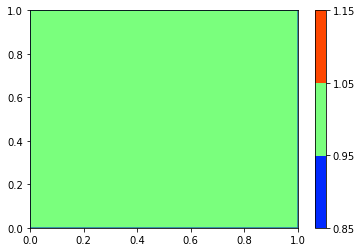

In [2]:
easy2D('TestCase1.dat')

### Prescribed Field
The next test will determine if the code can reproduce the correct prescribed field. The field that is desired is $\phi=x+y$. Again, a unit square meshed by 16 elements shall be used. The boundary conditions are as follows:
- Left: $\frac{d\phi}{dn}=-1$
- Right: $\frac{d\phi}{dn}=1$
- Top: $\frac{d\phi}{dn}=1$
- Bottom: $\frac{d\phi}{dn}=-1$
- At origin node: $\phi=0$

The resulting input file is below:
```
TestCase 2: Interior problem, quadratic domain, Neumann BC + single Dirichlet for well-posedness, phi=x+y
NODES
16,4
1,5,0,0,1,0
5,9,1,0,1,1
9,13,1,1,0,1
13,16,0,1,0,0.25
ELEMENTS
16,1
1,1,16,1
BOUNDARY CONDITIONS
5
1,1,1,1,0,0
1,1,2,0,1,-1
2,4,0,0,1,-1
5,12,0,0,1,1
13,16,0,0,1,-1
FIELD
9
0.25,0.25
0.25,0.5
0.25,0.75
0.5,0.25
0.5,0.5
0.5,0.75
0.75,0.25
0.75,0.5
0.75,0.75
SOLVE
```

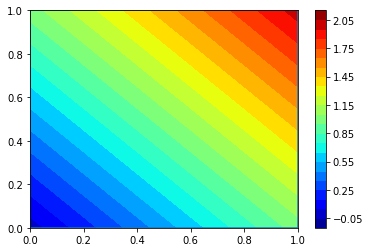

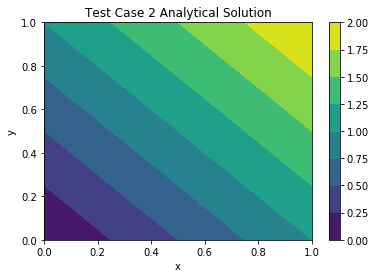

In [3]:
# Easy2D Solution
easy2D('TestCase2.dat')

# Real Solution
xlist = np.linspace(0, 1, 100)
ylist = np.linspace(0, 1, 100)
X, Y = np.meshgrid(xlist, ylist)
phi = X + Y
plt.figure()
cp = plt.contourf(X, Y, phi)
plt.colorbar(cp)
plt.title('Test Case 2 Analytical Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Triangle Geometry
The final internal case will still be solving for the $\phi=x+y$ field, however a triangle geometry shall be used instead. The triangle will go from $(0,0)\rightarrow(1,0)\rightarrow(0.5,1)\rightarrow(0,0)$ with 4 elements on each side. The derivation of the boundary conditions for the left and right side is given below.
$$\phi=x+y$$
$$\nabla\phi=\langle 1,1 \rangle$$
$$\frac{\partial\phi}{\partial n} = \nabla\phi\cdot \vec{n}$$
For the right side:
$$ m = \frac{1-0}{0.5-1}=-2$$
$$ y - 0.5 = -2(x-1) $$
$$ y + 2x - 2.5 = 0 $$
$$ \vec{n} = \langle 2, 1 \rangle $$
$$\left(\frac{\partial \phi}{\partial n}\right)_\text{right} = \langle 1,1 \rangle \cdot \frac{\langle 2,1 \rangle}{\sqrt{2^2 + 1^2}} = \frac{3}{\sqrt{5}}$$

For the left side:
$$ m = \frac{1-0}{0.5-0}=2$$
$$ y - 0 = 2(x-0) $$
$$ y - 2x = 0 $$
$$ \vec{n} = \langle -2, 1 \rangle $$
$$\left(\frac{\partial \phi}{\partial n}\right)_\text{left} = \langle 1,1 \rangle \cdot \frac{\langle -2,1 \rangle}{\sqrt{(-2)^2 + 1^2}} = \frac{1}{\sqrt{5}}$$
The bottom side boundary condition will simply be $\frac{\partial \phi}{\partial n}=-1$ and we will again specify the origin node to be $\phi=0$. The input file used to perform this is given below.
```
TestCase 3: Interior problem, quadratic domain, Neumann BC + single Dirichlet for well-posedness, phi=x+y
NODES
12,3
1,5,0,0,1,0
5,9,1,0,0.5,1
9,12,0.5,1,0.125,0.25
ELEMENTS
12,1
1,1,12,1
BOUNDARY CONDITIONS
5
1,1,1,1,0,0
1,1,2,0,1,-1
2,4,0,0,1,-1
5,8,0,0,1,1.3416407865
9,12,0,0,1,-0.4472135955
FIELD
16
0.2,0.1
0.3,0.1
0.4,0.1
0.5,0.1
0.6,0.1
0.7,0.1
0.8,0.1
0.3,0.25
0.4,0.25
0.5,0.25
0.6,0.25
0.7,0.25
0.4,0.5
0.5,0.5
0.6,0.5
0.5,0.75
SOLVE
```

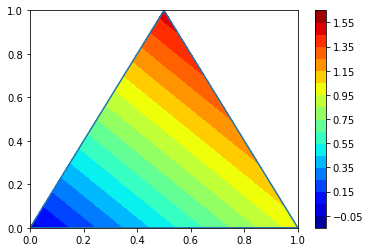

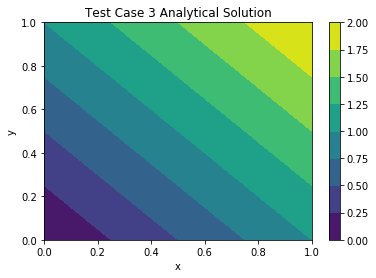

In [4]:
easy2D('TestCase3.dat')

# Real Solution
X = np.array([0,0.5,1])
Y = np.array([0,1,0])
phi = X + Y
plt.figure()
plt.plot(X,Y)
plt.tricontourf(X,Y,Z,11,cmap='jet')
plt.colorbar()
plt.title('Test Case 3 Analytical Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Exterior Problem

Next, an imaginary point source will be added to the center of a circle with radius 2, and the boundary conditions will be set such that it forces the solution to be $\phi=-\ln(r)$. Thus, the boundary conditions set for all nodes is 
$$\frac{\partial \phi}{\partial n} = -\frac{1}{r} \frac{\partial r}{\partial n} = \frac{1}{2} $$

```
TestCase 4 : Exterior problem, circular boundary radius 2, "imaginary source" in the center of the circle
EXTERIOR
NODES
100,100
1,1,2.000,0.000,2.000,0.000
2,2,1.996,0.126,1.996,0.126
3,3,1.984,0.251,1.984,0.251
4,4,1.965,0.375,1.965,0.375
5,5,1.937,0.497,1.937,0.497
6,6,1.902,0.618,1.902,0.618
7,7,1.860,0.736,1.860,0.736
8,8,1.810,0.852,1.810,0.852
9,9,1.753,0.964,1.753,0.964
10,10,1.689,1.072,1.689,1.072
11,11,1.618,1.176,1.618,1.176
12,12,1.541,1.275,1.541,1.275
13,13,1.458,1.369,1.458,1.369
14,14,1.369,1.458,1.369,1.458
15,15,1.275,1.541,1.275,1.541
16,16,1.176,1.618,1.176,1.618
17,17,1.072,1.689,1.072,1.689
18,18,0.964,1.753,0.964,1.753
19,19,0.852,1.810,0.852,1.810
20,20,0.736,1.860,0.736,1.860
21,21,0.618,1.902,0.618,1.902
22,22,0.497,1.937,0.497,1.937
23,23,0.375,1.965,0.375,1.965
24,24,0.251,1.984,0.251,1.984
25,25,0.126,1.996,0.126,1.996
26,26,-0.000,2.000,-0.000,2.000
27,27,-0.126,1.996,-0.126,1.996
28,28,-0.251,1.984,-0.251,1.984
29,29,-0.375,1.965,-0.375,1.965
30,30,-0.497,1.937,-0.497,1.937
31,31,-0.618,1.902,-0.618,1.902
32,32,-0.736,1.860,-0.736,1.860
33,33,-0.852,1.810,-0.852,1.810
34,34,-0.964,1.753,-0.964,1.753
35,35,-1.072,1.689,-1.072,1.689
36,36,-1.176,1.618,-1.176,1.618
37,37,-1.275,1.541,-1.275,1.541
38,38,-1.369,1.458,-1.369,1.458
39,39,-1.458,1.369,-1.458,1.369
40,40,-1.541,1.275,-1.541,1.275
41,41,-1.618,1.176,-1.618,1.176
42,42,-1.689,1.072,-1.689,1.072
43,43,-1.753,0.964,-1.753,0.964
44,44,-1.810,0.852,-1.810,0.852
45,45,-1.860,0.736,-1.860,0.736
46,46,-1.902,0.618,-1.902,0.618
47,47,-1.937,0.497,-1.937,0.497
48,48,-1.965,0.375,-1.965,0.375
49,49,-1.984,0.251,-1.984,0.251
50,50,-1.996,0.126,-1.996,0.126
51,51,-2.000,-0.000,-2.000,-0.000
52,52,-1.996,-0.126,-1.996,-0.126
53,53,-1.984,-0.251,-1.984,-0.251
54,54,-1.965,-0.375,-1.965,-0.375
55,55,-1.937,-0.497,-1.937,-0.497
56,56,-1.902,-0.618,-1.902,-0.618
57,57,-1.860,-0.736,-1.860,-0.736
58,58,-1.810,-0.852,-1.810,-0.852
59,59,-1.753,-0.964,-1.753,-0.964
60,60,-1.689,-1.072,-1.689,-1.072
61,61,-1.618,-1.176,-1.618,-1.176
62,62,-1.541,-1.275,-1.541,-1.275
63,63,-1.458,-1.369,-1.458,-1.369
64,64,-1.369,-1.458,-1.369,-1.458
65,65,-1.275,-1.541,-1.275,-1.541
66,66,-1.176,-1.618,-1.176,-1.618
67,67,-1.072,-1.689,-1.072,-1.689
68,68,-0.964,-1.753,-0.964,-1.753
69,69,-0.852,-1.810,-0.852,-1.810
70,70,-0.736,-1.860,-0.736,-1.860
71,71,-0.618,-1.902,-0.618,-1.902
72,72,-0.497,-1.937,-0.497,-1.937
73,73,-0.375,-1.965,-0.375,-1.965
74,74,-0.251,-1.984,-0.251,-1.984
75,75,-0.126,-1.996,-0.126,-1.996
76,76,-0.000,-2.000,-0.000,-2.000
77,77,0.126,-1.996,0.126,-1.996
78,78,0.251,-1.984,0.251,-1.984
79,79,0.375,-1.965,0.375,-1.965
80,80,0.497,-1.937,0.497,-1.937
81,81,0.618,-1.902,0.618,-1.902
82,82,0.736,-1.860,0.736,-1.860
83,83,0.852,-1.810,0.852,-1.810
84,84,0.964,-1.753,0.964,-1.753
85,85,1.072,-1.689,1.072,-1.689
86,86,1.176,-1.618,1.176,-1.618
87,87,1.275,-1.541,1.275,-1.541
88,88,1.369,-1.458,1.369,-1.458
89,89,1.458,-1.369,1.458,-1.369
90,90,1.541,-1.275,1.541,-1.275
91,91,1.618,-1.176,1.618,-1.176
92,92,1.689,-1.072,1.689,-1.072
93,93,1.753,-0.964,1.753,-0.964
94,94,1.810,-0.852,1.810,-0.852
95,95,1.860,-0.736,1.860,-0.736
96,96,1.902,-0.618,1.902,-0.618
97,97,1.937,-0.497,1.937,-0.497
98,98,1.965,-0.375,1.965,-0.375
99,99,1.984,-0.251,1.984,-0.251
100,100,1.996,-0.126,1.996,-0.126
ELEMENTS
50,1
1,1,50,2
BOUNDARY CONDITIONS
1
1,50,0,0,1,0.5
FIELD
48
-4,4
-3,4
-2,4
-1,4
0,4
1,4
2,4
3,4
4,4
4,3
4,2
4,1
4,0
4,-1
4,-2
4,-3
4,-4
3,-4
2,-4
1,-4
0,-4
-1,-4
-2,-4
-3,-4
-4,-4
-4,-3
-4,-2
-4,-1
-4,0
-4,1
-4,2
-4,3
1.99,0
-1.99,0
0,-1.97
0,1.97
1.4,1.4
1.4,-1.4
-1.4,1.4
-1.4,-1.4
0.75,1.83
0.75,-1.83
-0.75,1.83
-0.75,-1.83
1.84,0.76
1.84,-0.76
-1.84,0.76
-1.84,-0.76
SOLVE
```

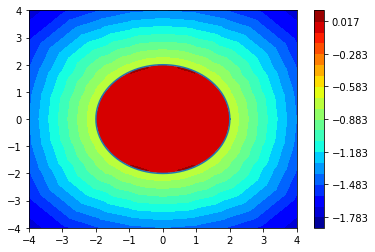

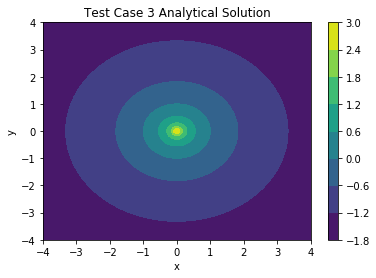

In [9]:
easy2D('TestCase4.dat')

# Real Solution
xlist = np.linspace(-4, 4, 100)
ylist = np.linspace(-4, 4, 100)
X, Y = np.meshgrid(xlist, ylist)
phi = -np.log(np.sqrt(X**2 + Y**2))
plt.figure()
cp = plt.contourf(X, Y, phi)
plt.colorbar(cp)
plt.title('Test Case 4 Analytical Solution')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

## Scattering Problems

### Velocity Field

Now a velocity field will be introduced to the exterior domain, with the first case letting the boundary be invisible and the second introducing scattering. The first case should yield a linear gradient going from right to left, unaltered by the boundary. The second case should show the field being altered by the geometry.

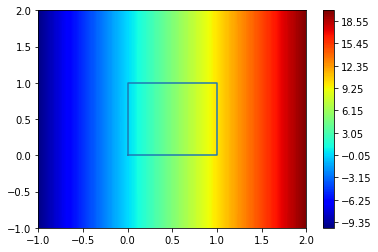

In [10]:
easy2D('TestCase6.dat')

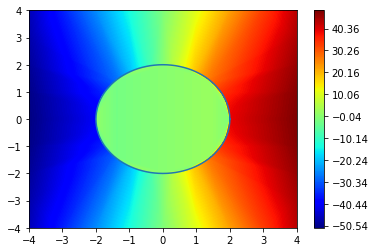

In [11]:
easy2D('TestCase7.dat')